In [4]:
#importing necessary modules

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
#importing two CSV files

city_data_csv_file = "data/city_data.csv"
ride_data_csv_file = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_csv_file)
ride_data_df = pd.read_csv(ride_data_csv_file)

# Combine the data into a single dataset
merged_data_df = pd.merge(ride_data_df, city_data_df, on="city")

# Display the data table for preview
merged_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [6]:
# Calculating Average Fare and Total Number of Rides per each city
average_fare = merged_data_df.groupby(["city"]).mean()["fare"]
total_number_of_rides = merged_data_df.groupby(["city"]).count()["fare"]
driver_count = merged_data_df.groupby(["city"])["driver_count"].unique()
city_type = merged_data_df.groupby(["city"])["type"].unique()

df = pd.DataFrame({"Average Fare": average_fare, "Total Number of Rides": total_number_of_rides, "Driver Count": driver_count, 
                   "City Type": city_type })

urban_data = df.loc[df['City Type']=="Urban"]
suburban_data = df.loc[df['City Type']=="Suburban"]
rural_data = df.loc[df['City Type']=="Rural"]



No handles with labels found to put in legend.


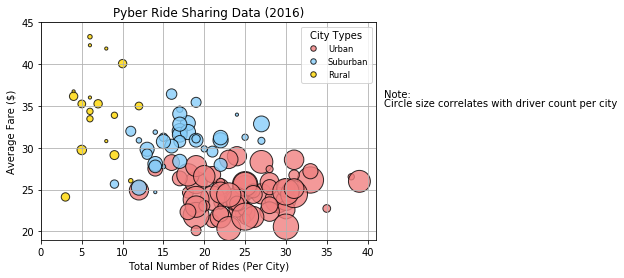

In [7]:
# Obtain the x and y coordinates for each of the three city types
urban_data_x = [x for x in urban_data["Total Number of Rides"]]
urban_data_y = [y for y in urban_data["Average Fare"]]
urban_data_size = [size*10 for size in urban_data["Driver Count"]]

suburban_data_x = [x for x in suburban_data["Total Number of Rides"]]
suburban_data_y = [y for y in suburban_data["Average Fare"]]
suburban_data_size = [size*10 for size in suburban_data["Driver Count"]]

rural_data_x = [x for x in rural_data["Total Number of Rides"]]
rural_data_y = [y for y in rural_data["Average Fare"]]
rural_data_size = [size*10 for size in rural_data["Driver Count"]]

# Build the scatter plots for each city types
a = plt.scatter(urban_data_x, urban_data_y, s=urban_data_size, c="lightcoral", edgecolors="black", 
                     alpha=0.8, linewidth=None)
b = plt.scatter(suburban_data_x, suburban_data_y, s=suburban_data_size, c="lightskyblue", edgecolors="black",
            alpha=0.8, linewidth=None)
c = plt.scatter(rural_data_x, rural_data_y, s=rural_data_size, c="gold", edgecolors="black", alpha=0.8, 
            linewidth=None)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="upper right")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlim(0, 41)
plt.ylim(19, 45)
plt.grid()

# Create a legend
legend = plt.legend((a,b,c), ("Urban", "Suburban", "Rural"), title="City Types", 
                    scatteryoffsets=[.5], fontsize="small", markerscale=0.5)

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 36, "Note:")
plt.text(42, 35, "Circle size correlates with driver count per city")

# Save Figure
plt.savefig("Bubble_Plot_of_Ride_Sharing_Data")

# Show plot
plt.show()

## Total Fares by City Type

['Rural', 'Suburban', 'Urban']
[6.8, 30.5, 62.7]


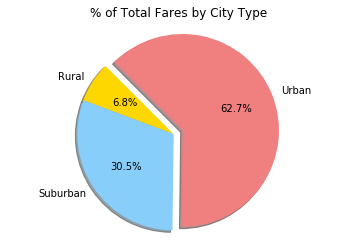

In [8]:
# Calculate Type Percents
total_fare = merged_data_df["fare"].sum()
each_fare = merged_data_df.groupby(["type"]).sum()["fare"]
percent_fare = each_fare / total_fare *100
df1 = pd.DataFrame({"Total Fare by City Type": percent_fare}).reset_index()
df1 = df1.sort_values(by=["type"])
df1["Total Fare by City Type"] = df1["Total Fare by City Type"].round(1)
#df1["Total Fare by City Type"] = df1["Total Fare by City Type"].map("{:,.1f}%".format)

city_types = [x for x in df1["type"]]
total_fares = [x for x in df1["Total Fare by City Type"]]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

print(city_types)
print(total_fares)

# Build Pie Chart
plt.pie(total_fares, explode=explode, labels=city_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total_Fares_by_City_Type")

### Show Figure
plt.show()

## Total Rides by City Type

['Rural', 'Suburban', 'Urban']
[5.3, 26.3, 68.4]


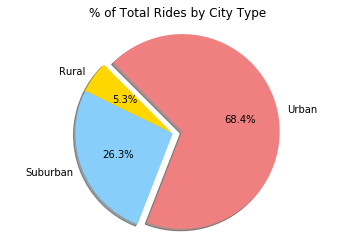

In [9]:
# Calculate Ride Percents
total_ride = merged_data_df["type"].count()
ride_per_city_type = merged_data_df["type"].value_counts()
percent_ride = ride_per_city_type / total_ride * 100
df2 = pd.DataFrame({"Total Ride by City Type": percent_ride}).reset_index()
df2 = df2.sort_values(by=["index"])
df2["Total Ride by City Type"] = df2["Total Ride by City Type"].round(1)

city_types = [x for x in df2["index"]]
total_rides = [x for x in df2["Total Ride by City Type"]]

print(city_types)
print(total_rides)

# Build Pie Chart
plt.pie(total_rides, explode=explode, labels=city_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total_Rides_by_City_Type")

# Show Figure
plt.show()

## Total Drivers by City Type

['Rural', 'Suburban', 'Urban']
[2.6, 16.5, 80.9]


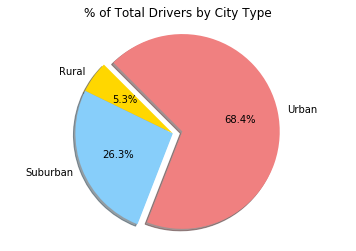

In [10]:
# Calculate Driver Percents
dropped_duplicates = merged_data_df[["city", "driver_count", "type"]].drop_duplicates()
drivers_per_city_type = dropped_duplicates.groupby(["type"]).sum()["driver_count"]
total_drivers = driver_count.sum()
percent_drivers = drivers_per_city_type / total_drivers * 100
df3 = pd.DataFrame({"Total Drivers by City Type": percent_drivers}).reset_index()
df3 = df3.sort_values(by=["type"])
df3["Total Drivers by City Type"] = df3["Total Drivers by City Type"].round(1)

city_types = [x for x in df3["type"]]
total_drivers = [x for x in df3["Total Drivers by City Type"]]

print(city_types)
print(total_drivers)

# Build Pie Charts
plt.pie(total_rides, explode=explode, labels=city_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total_Driver_by_City_Type")

# Show Figure
plt.show()

## Three Observable Trends

In [2]:
#1. % of Total Drivers by City Type and % of Total Rides by City Type are very simiilar, 
    #Showing that # of drivers avaible correlate well with # of business.

#2. Rural & Suburban areas are more profitable per ride than Urban area. 

#3. Acquiring more drivers from Suburban and Rural area can boost the company's income